# Splinart on a circle

In this tutorial, we will see how to use splinart with a circle. 

First of all, we have to create a circle.

In [34]:
import splinart as spl
center = [.5, .5]
radius = .3
theta, path = spl.circle(center, radius)

In the previous code, we create a discretization of a circle centered in $[0.5, 0.5]$ with a radius of $0.3$. We don't specify the number of discretization points. The default is 30 points.

We can plot the points using matplotlib.

In [2]:
%matplotlib inline

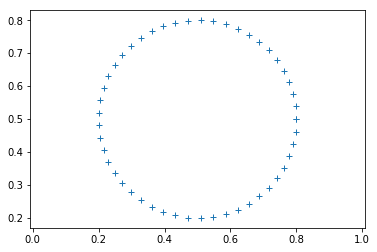

In [6]:
import matplotlib.pyplot as plt
plt.axis("equal")
plt.plot(path[:, 0], path[:, 1], '+')

## The sample

In order to compute a sample on a given cubic spline equation, we need to provide a Python function that gives us the x coordinates. We can choose for example.

In [12]:
import numpy as np
def x_func():
    nsamples = 500
    return (np.random.random() + 2 * np.pi * np.linspace(0, 1, nsamples))%(2*np.pi)

We can see that the points are chosen between $[0, 2\pi]$ in a random fashion.

## The cubic spline

Given a path, we can apply the spline function in order to compute the second derivative of this cubic spline.

In [13]:
yder2 = spl.spline.spline(theta, path)

And apply the equation to the sample

In [14]:
xsample = x_func()
ysample = np.zeros((xsample.size, 2))
spl.spline.splint(theta, path, yder2, xsample, ysample)

which gives

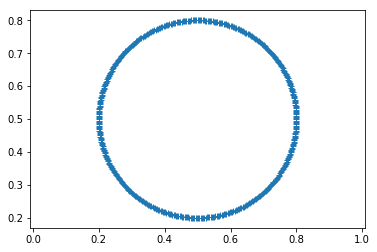

In [15]:
import matplotlib.pyplot as plt
plt.axis("equal")
plt.plot(ysample[:, 0], ysample[:, 1], '+')

We can see the sample is well defined around the circle that we defined previously.

Now, assume that we move randomly the points of the circle with a small distance.

In [35]:
spl.compute.update_path(path, scale_value=.001, periodic=True)

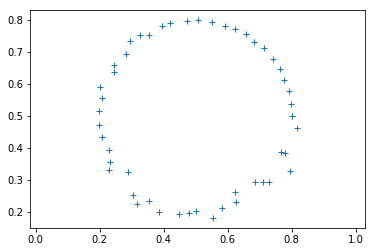

In [36]:
import matplotlib.pyplot as plt
plt.axis("equal")
plt.plot(path[:, 0], path[:, 1], '+')

And we compute again the sample of the new cubic spline equation.

In [37]:
yder2 = spl.spline.spline(theta, path)
spl.spline.splint(theta, path, yder2, xsample, ysample)
spl.compute.update_path(path, scale_value=.001, periodic=True)

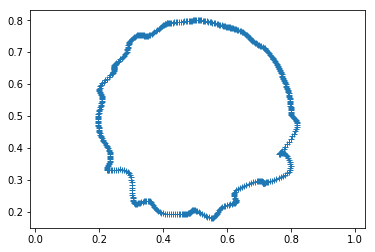

In [39]:
import matplotlib.pyplot as plt
plt.axis("equal")
plt.plot(ysample[:, 0], ysample[:, 1], '+')

The circle is deformed.

This is exactly how works splinart. We give a shape and at each step

- we perturb the points of this shape
- we compute a sample an this new cubic spline equation
- we add the pixel with a given color on the output image

And we do that several time. We can have the following result

In [40]:
img_size, channels = 1000, 4
img = np.ones((img_size, img_size, channels), dtype=np.float32)

theta, path = spl.circle(center, radius)
spl.update_img(img, path, x_func, nrep=4000, x=theta, scale_value=.00005)

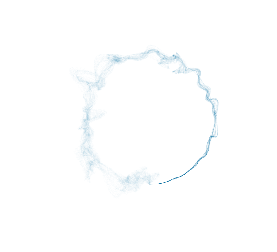

In [41]:
spl.show_img(img)